** PREDICTION WITHOUT USING SMOTE(BALANCING)**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


# **INTRODUCING THE DATA**

In [ ]:
stroke = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
stroke.shape

(5110, 12)

In [ ]:
# removing that values that thay are empty
stroke.dropna(subset=['bmi'], inplace=True)

In [ ]:
# droping the colums that thay are not important for prediction
stroke = stroke.drop(['id'] , axis=1)

In [ ]:
stroke.shape

(4909, 11)

# **working on data and prediction**

In [ ]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# converting the string in columns to integer
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in stroke.columns:
     stroke[col] = le.fit_transform(stroke[col])

In [ ]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3734,239,1,1
2,1,101,0,1,1,2,0,2429,198,2,1
3,0,70,0,0,1,2,1,3309,217,3,1
4,0,100,1,0,1,3,0,3318,113,2,1
5,1,102,0,0,1,2,1,3367,163,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,34,0,0,0,4,0,2324,59,0,0
5106,0,102,0,0,1,3,1,2960,273,2,0
5107,0,56,0,0,1,3,0,1290,179,2,0
5108,1,72,0,0,1,2,0,3289,129,1,0


In [ ]:
x=stroke.drop('stroke' ,axis=1).values
y=stroke['stroke'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=0)

**LogesticRegration Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
lo= LogisticRegression(random_state=0)
lo.fit(x_train, y_train)
y_predict = lo.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.20      0.02      0.04        43

    accuracy                           0.95       982
   macro avg       0.58      0.51      0.51       982
weighted avg       0.92      0.95      0.94       982



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


col_0,0,1
row_0,,
0,935,4
1,42,1


In [ ]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test, y_predict)
a

0.9531568228105907

In [ ]:
 # ( True Positive , False Negative , True Negative , False Positive )
 perf_measure(y_test, y_predict)

(1, 4, 935, 42)

In [ ]:
# true positive
a1 = truepositive(y_test, y_predict)
a1

1

**K_nearestneighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors = 5 , metric= 'minkowski' , p=2)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.95      0.93       982



col_0,0,1
row_0,,
0,935,4
1,43,0


In [ ]:
from sklearn.metrics import accuracy_score
b=accuracy_score(y_test, y_predict)
b

0.9521384928716904

In [ ]:
 perf_measure(y_test, y_predict)

(0, 4, 935, 43)

In [ ]:
b1 = truepositive(y_test, y_predict)
b1

0

**Decision Trees and random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=100 , criterion='entropy')
random.fit(x_train, y_train)
y_predict= random.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


col_0,0
row_0,
0,939
1,43


In [ ]:
from sklearn.metrics import accuracy_score
c=accuracy_score(y_test, y_predict)
c

0.9562118126272913

In [ ]:
 perf_measure(y_test, y_predict)

(0, 0, 939, 43)

In [ ]:
c1 = truepositive(y_test, y_predict)
c1

0

**Naive bayes classification**

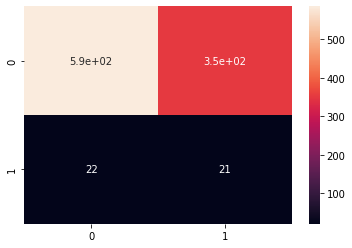

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train, y_train)
y_predict=classifier.predict(x_test)
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm, annot=True )

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.96      0.62      0.76       939
           1       0.06      0.49      0.10        43

    accuracy                           0.62       982
   macro avg       0.51      0.56      0.43       982
weighted avg       0.92      0.62      0.73       982



col_0,0,1
row_0,,
0,586,353
1,22,21


In [ ]:
from sklearn.metrics import accuracy_score
d=accuracy_score(y_test, y_predict)
d

0.6181262729124236

In [ ]:
perf_measure(y_test, y_predict)

(21, 353, 586, 22)

In [ ]:
d1 = truepositive(y_test, y_predict)
d1

21

**xgboost**

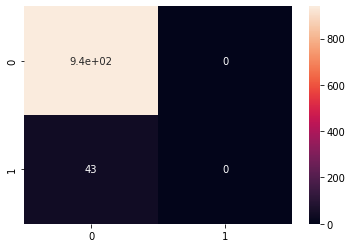

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm, annot=True )

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


col_0,0
row_0,
0,939
1,43


In [ ]:
from sklearn.metrics import accuracy_score
e=accuracy_score(y_test, y_predict)
e

0.9562118126272913

In [ ]:
perf_measure(y_test, y_predict)

(0, 0, 939, 43)

In [ ]:
e1 = truepositive(y_test, y_predict)
e1

0

**catboost**

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Learning rate set to 0.018476
0:	learn: 0.6643141	total: 2.24ms	remaining: 2.24s
1:	learn: 0.6331317	total: 3.87ms	remaining: 1.93s
2:	learn: 0.6063427	total: 5.55ms	remaining: 1.84s
3:	learn: 0.5774412	total: 7.32ms	remaining: 1.82s
4:	learn: 0.5550620	total: 9.07ms	remaining: 1.8s
5:	learn: 0.5291436	total: 10.9ms	remaining: 1.81s
6:	learn: 0.5104032	total: 12.8ms	remaining: 1.81s
7:	learn: 0.4933973	total: 14ms	remaining: 1.73s
8:	learn: 0.4755863	total: 15.8ms	remaining: 1.74s
9:	learn: 0.4588544	total: 17.5ms	remaining: 1.74s
10:	learn: 0.4408748	total: 19.3ms	remaining: 1.73s
11:	learn: 0.4268759	total: 21.1ms	remaining: 1.73s
12:	learn: 0.4122038	total: 22.6ms	remaining: 1.71s
13:	learn: 0.3968467	total: 24.4ms	remaining: 1.72s
14:	learn: 0.3810464	total: 26.1ms	remaining: 1.71s
15:	learn: 0.3678285	total: 27.9ms	remaining: 1.71s
16:	learn: 0.3555762	total: 29.6ms	remaining: 1.71s
17:	learn: 0.3438138	total: 31.4ms	remaining: 1.71s
18:	learn: 0.3339879	total: 33.2ms	remaining: 1

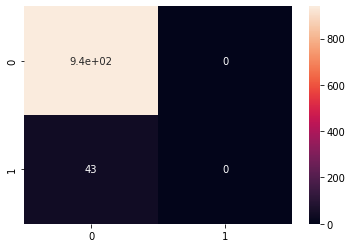

In [ ]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
cat.fit(x_train, y_train)
y_predict=model.predict(x_test)
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm, annot=True )

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


col_0,0
row_0,
0,939
1,43


In [ ]:
from sklearn.metrics import accuracy_score
f=accuracy_score(y_test, y_predict)
f

0.9562118126272913

In [ ]:
perf_measure(y_test, y_predict)

(0, 0, 939, 43)

In [ ]:
f1 = truepositive(y_test, y_predict)
f1

0

**GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8778004073319755

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


col_0,0
row_0,
0,939
1,43


In [ ]:
from sklearn.metrics import accuracy_score
g=accuracy_score(y_test, y_predict)
g

0.9562118126272913

In [ ]:
perf_measure(y_test, y_predict)

(0, 0, 939, 43)

In [ ]:
g1 = truepositive(y_test, y_predict)
g1

0

# **Result of our prediction**

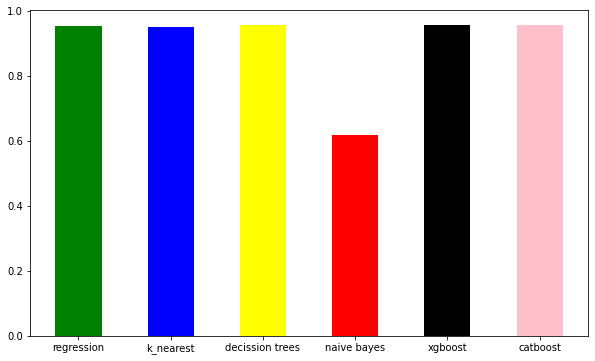

In [ ]:
# totall accuracy 
plt.figure(figsize=[10,6])
left=[1,2,3,4,5,6]
high=[a,b,c,d,e,f]
tic=['regression' , 'k_nearest' , 'decission trees' , 'naive bayes', 'xgboost' , 'catboost']
plt.bar(left, high ,tick_label=tic  ,width=0.5 ,color=['green' , 'blue' ,'yellow' ,'red','black','pink'])
plt.show()

<BarContainer object of 6 artists>

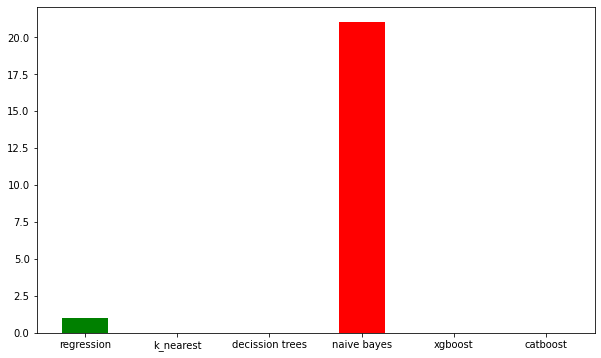

In [ ]:
# class 1
plt.figure(figsize=[10,6])
left=[1,2,3,4,5,6]
high=[a1,b1,c1,d1,e1,f1]
tic=['regression' , 'k_nearest' , 'decission trees' ,'naive bayes', 'xgboost' , 'catboost']
plt.bar(left, high ,tick_label=tic  ,width=0.5 ,color=['green' , 'blue' ,'yellow' ,'red','black'])

Best Model for our data is decission trees but Naive bayes classification is the best model for predict our lowes class(class 1).

In [ ]:
from sklearn import datasets
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
rf_predict=lo.predict(x_test)
nb_predict=classifier.predict(x_test)
lg_predict=random.predict(x_test)
kn_predict=classifier.predict(x_test)
xg_predict=model.predict(x_test)
ca_predict=cat.predict(x_test)

In [ ]:
rf_auc=roc_auc_score(y_test,rf_predict)
nb_auc=roc_auc_score(y_test,nb_predict)
lg_auc=roc_auc_score(y_test,lg_predict)
kn_auc=roc_auc_score(y_test,kn_predict)
xg_auc=roc_auc_score(y_test,xg_predict)
ca_auc=roc_auc_score(y_test,ca_predict)

In [ ]:
rf_fpr,rf_tpr,_ =roc_curve(y_test,rf_predict)
nb_fpr,nb_tpr,_ =roc_curve(y_test,nb_predict)
lg_fpr,lg_tpr,_ =roc_curve(y_test,lg_predict)
kn_fpr,kn_tpr,_ =roc_curve(y_test,kn_predict)
xg_fpr,xg_tpr,_ =roc_curve(y_test,xg_predict)
ca_fpr,ca_tpr,_ =roc_curve(y_test,ca_predict)

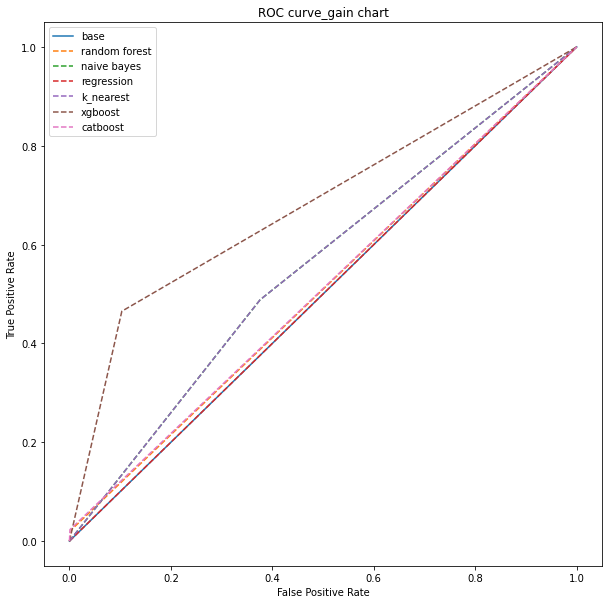

In [ ]:
plt.subplots(1, figsize=(10,10))
r=[0,0.5,1]
p=r
plt.plot(r,p , linestyle='-', label='base')
plt.plot(rf_fpr,rf_tpr , linestyle='--' , label='random forest')
plt.plot(nb_fpr,nb_tpr , linestyle='--' , label='naive bayes')
plt.plot(lg_fpr,lg_tpr , linestyle='--' , label='regression')
plt.plot(kn_fpr,kn_tpr , linestyle='--' , label='k_nearest')
plt.plot(xg_fpr,xg_tpr , linestyle='--' , label='xgboost')
plt.plot(ca_fpr,ca_tpr , linestyle='--' , label='catboost')



plt.title('ROC curve_gain chart')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# **useful functions**

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix 

In [ ]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1
    return(TP, FP, TN, FN)

In [ ]:
def truepositive(y_actual, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()
    return(tp)

In [ ]:
def stackbar(x,y):
   tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
   plt.figure(figsize=(6,8))
   x=['class0' , 'class1']
   y1=[tn , fn]
   y2=[tp , tn]
   plt.bar(x, y1, color='g')
   plt.bar(x, y2, bottom=y1, color='b')
   plt.legend()
   plt.show()

In [ ]:
def barplot(a,b):
  plt.figure(figsize=[8,4])
  left=[]
  high=[]
  for i in a:
    left.append(i)
  for j in b:
      high.append(j)
  return(plt.bar(left, left ,tick_label=high, width=12  ,color=['yellow' ,'red','black','pink','green'])) 